In [38]:
# data input
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from math import sqrt

training = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)
training2 = pd.read_csv('bezdekIris.data', sep=",", header=None)

In [39]:
# make sure& transform
# for mushroom
df_training = pd.DataFrame(training)
df_training.columns=['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size', 'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color','ring-number','ring-type', 'spore-print-color','population','habitat']

sample_num= len (df_training.index)
feature_num = len(df_training.columns)-1

print('mushroom:')
print('sample num ', sample_num)
print('feature_num', feature_num)

print()
# for iris

df_training2 = pd.DataFrame(training2)
df_training2.columns=['sepal_length','sepal_width','petal_length','petal_width','class']

sample_num2= len (df_training2.index)
feature_num2 = len(df_training2.columns)-1
print('iris:')
print('sample num ', sample_num2)
print('feature_num', feature_num2)

mushroom:
sample num  8124
feature_num 22

iris:
sample num  150
feature_num 4


x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64
s    4936
k    23

C:\Users\amy58\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


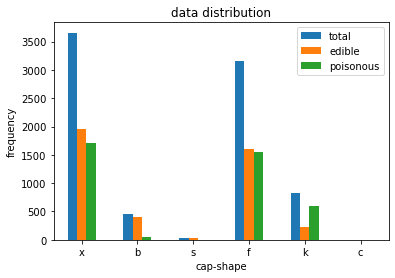

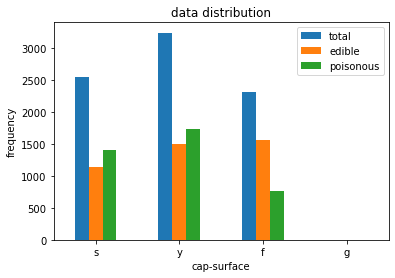

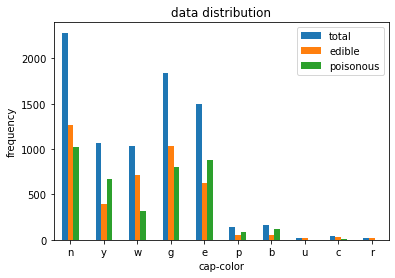

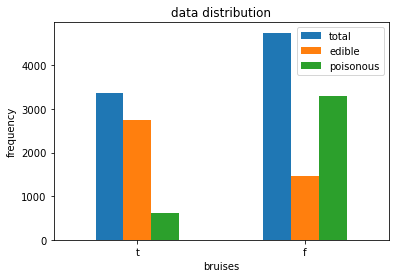

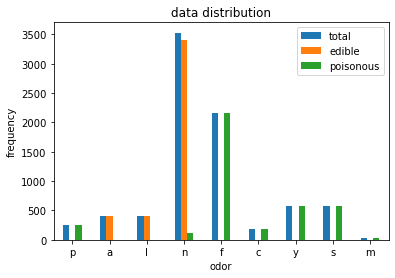

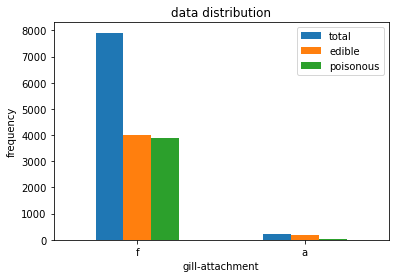

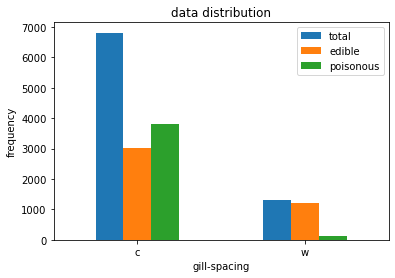

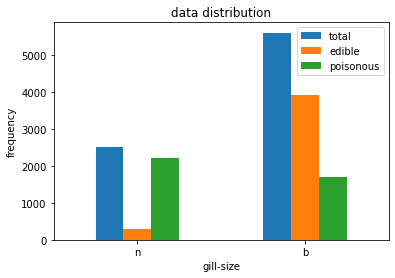

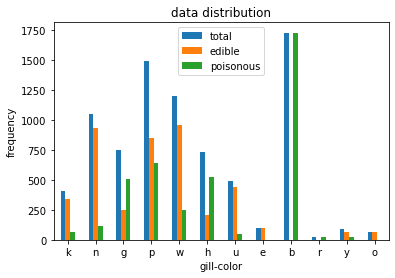

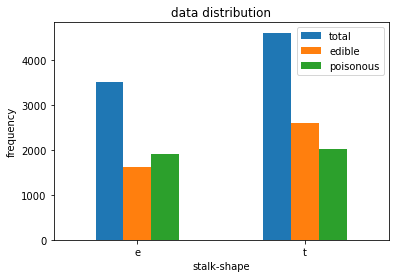

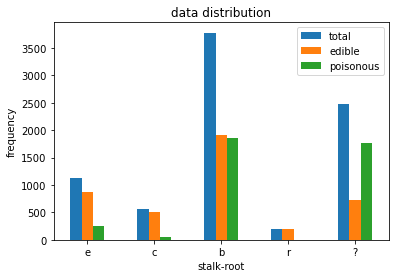

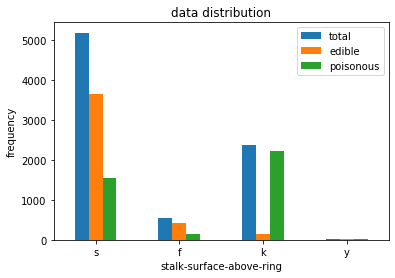

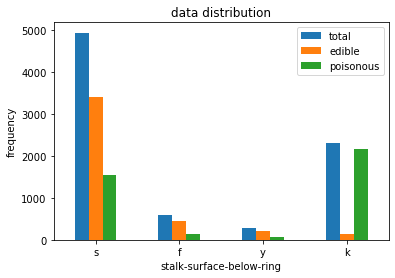

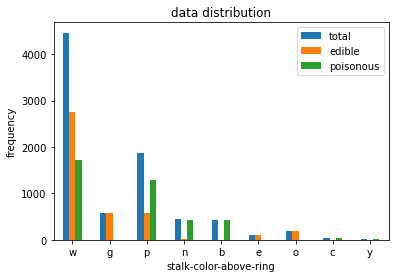

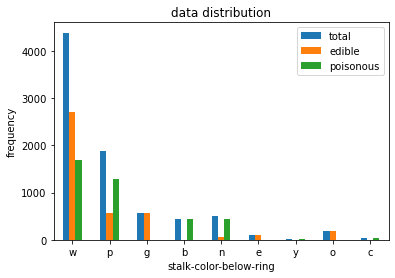

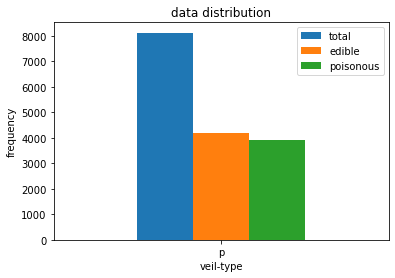

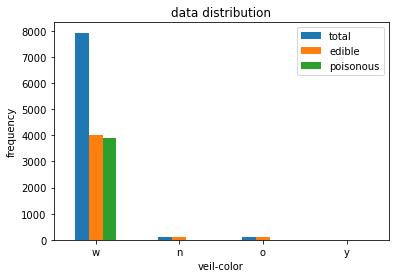

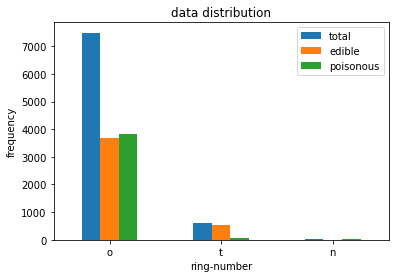

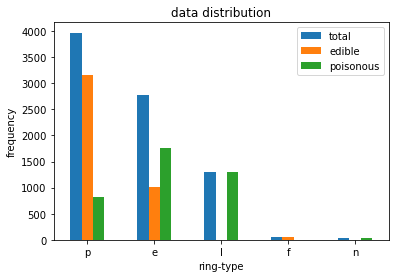

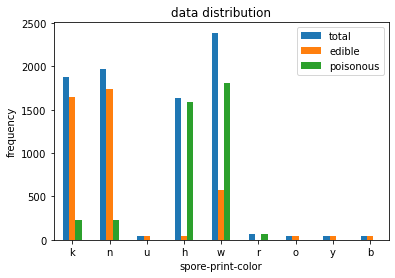

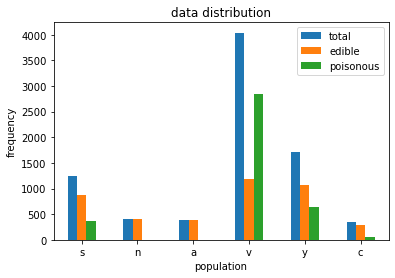

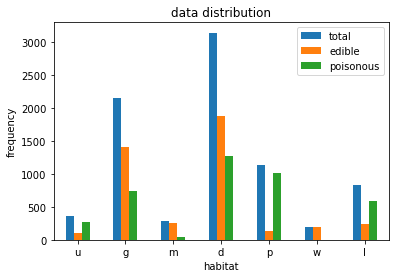

In [40]:
# Data Visualization
# for mushroom
first = df_training[df_training.columns[0]] 
feature = df_training[df_training.columns[1:23]] 
edible = feature[first=='e'] 
poisonous = feature[first=='p'] 

for i in range(1,23):     
    A = df_training[(df_training.columns)[i]].value_counts()
    print(A)
    E = edible[(df_training.columns)[i]].value_counts()
    P = poisonous[(df_training.columns)[i]].value_counts()
    index = df_training[(df_training.columns)[i]].unique()
    df = pd.DataFrame({'total':A,'edible': E,'poisonous': P}, index=index)
    ax = df.plot.bar(rot=0)
    plt.title('data distribution')
    plt.xlabel((df_training.columns)[i])
    plt.ylabel('frequency')
    plt.savefig((df_training.columns)[i])


In [41]:
# Data Visualization
# for iris
# require binning

def binning(a):
    s= len(a)/5
    a.reset_index(drop = True, inplace = True)
    split = a.index < s
    get1 = a[split]
    split = np.logical_and(a.index >= s , a.index < 2*s)
    get2 = a[split]
    split = np.logical_and(a.index >= 2*s , a.index < 3*s)
    get3  = a[split]
    split = np.logical_and(a.index >= 3*s , a.index < 4*s)
    get4  = a[split]
    split = np.logical_and(a.index >= 4*s , a.index < 5*s)
    get5  = a[split]
    get2 = get2.reset_index(drop=True)
    get3 = get3.reset_index(drop=True)
    get4 = get4.reset_index(drop=True)
    get5 = get5.reset_index(drop=True)
    return get1, get2, get3, get4, get5


sepal_length percentage average: 
0.2
overall  4.7733333333333325
se  4.51
ve  5.26
vi  5.76
0.4
overall  5.283333333333333
se  4.83
ve  5.630000000000001
vi  6.27
0.6
overall  5.8
se  5.0200000000000005
ve  5.890000000000001
vi  6.5
0.8
overall  6.31
se  5.15
ve  6.209999999999999
vi  6.87
1
overall  7.049999999999998
se  5.5200000000000005
ve  6.69
vi  7.540000000000001

sepal_width percentage average: 
0.2
overall  2.473333333333334
se  2.9400000000000004
ve  2.3
vi  2.55
0.4
overall  2.8433333333333337
se  3.22
ve  2.6100000000000003
vi  2.8
0.6
overall  3.023333333333332
se  3.4200000000000004
ve  2.8199999999999994
vi  2.9899999999999998
0.8
overall  3.2533333333333347
se  3.5900000000000007
ve  2.96
vi  3.1
1
overall  3.693333333333334
se  3.9699999999999998
ve  3.1599999999999997
vi  3.4299999999999997

petal_length percentage average: 
0.2
overall  1.3599999999999999
se  1.23
ve  3.55
vi  4.89
0.4
overall  2.2600000000000002
se  1.3900000000000001
ve  4.040000000000001
vi  5.1

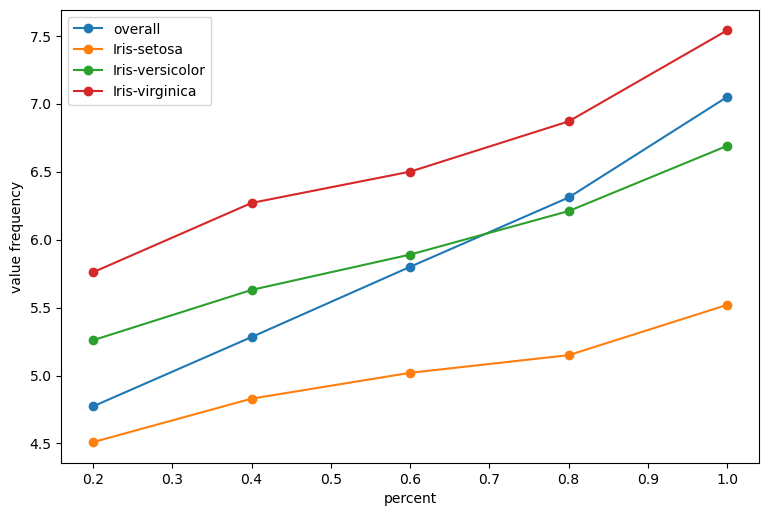

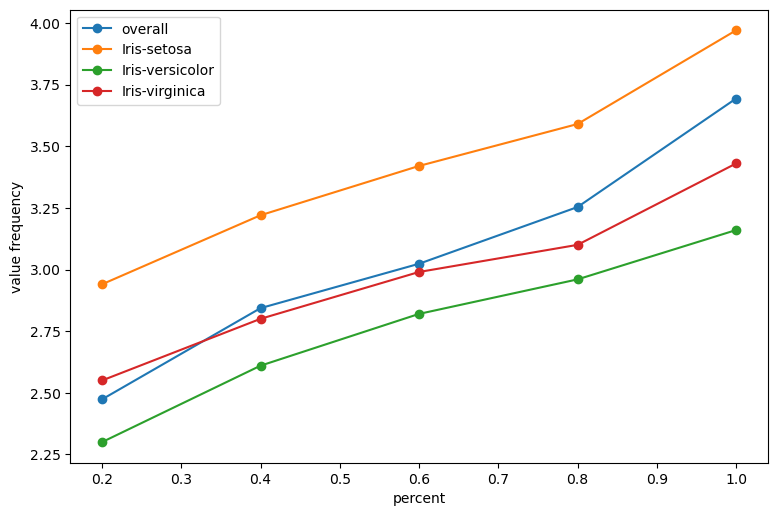

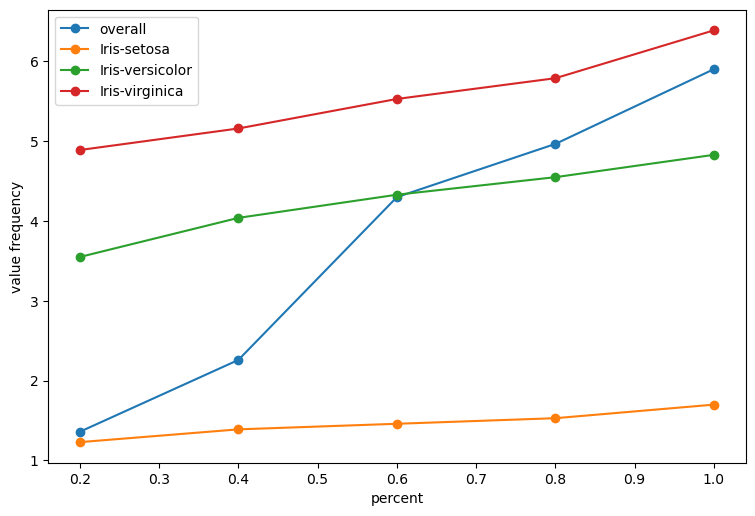

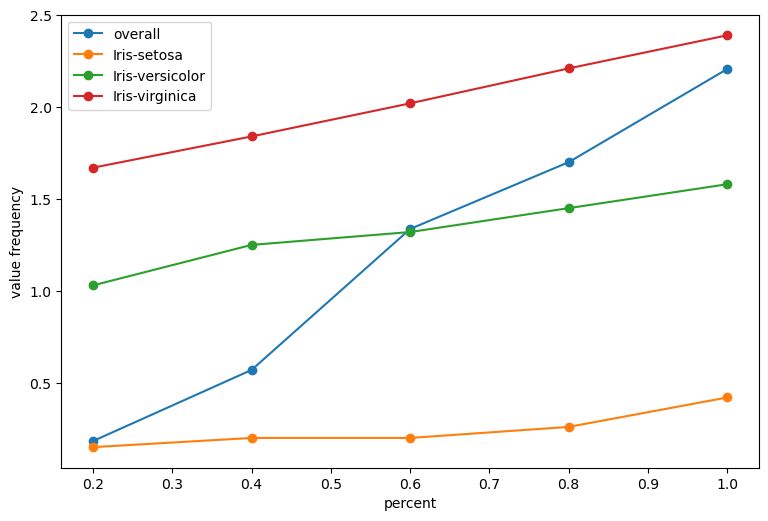

In [42]:
# Data Visualization
# for iris
# show the average in the range of 20% in order to view the distribution

lst_avg = []
lst_std = []
for i in range(0,4):     
    A = df_training2[(df_training2.columns)[i]].sum()/len (df_training2.index)
    B = sum([(x-A)**2 for x in df_training2[(df_training2.columns)[i]]]) / float(len (df_training2.index)-1)
    lst_avg.append(A)
    lst_std.append(sqrt(B))


percent = [0.2, 0.4, 0.6, 0.8, 1]

for i in range(0,4):
    df_training2.sort_values(by=[(df_training2.columns)[i]], ascending=True, inplace=True)
    first = df_training2[df_training2.columns[-1]] 
    se = df_training2[first=='Iris-setosa'] 
    ve = df_training2[first=='Iris-versicolor'] 
    vi = df_training2[first=='Iris-virginica']
    lst = []
    lst_se = []
    lst_ve = []
    lst_vi = []
    get1, get2, get3, get4, get5= binning(df_training2)
    lst.append(get1)
    lst.append(get2)
    lst.append(get3)
    lst.append(get4)
    lst.append(get5)
    get1, get2, get3, get4, get5= binning(se)
    lst_se.append(get1)
    lst_se.append(get2)
    lst_se.append(get3)
    lst_se.append(get4)
    lst_se.append(get5)
    get1, get2, get3, get4, get5= binning(ve)
    lst_ve.append(get1)
    lst_ve.append(get2)
    lst_ve.append(get3)
    lst_ve.append(get4)
    lst_ve.append(get5)
    get1, get2, get3, get4, get5= binning(vi)
    lst_vi.append(get1)
    lst_vi.append(get2)
    lst_vi.append(get3)
    lst_vi.append(get4)
    lst_vi.append(get5)
    res = []
    res_se = []
    res_ve = []
    res_vi = []
    print((df_training2.columns)[i], 'percentage average: ')
    for j in range(0,5):
        print(percent[j])
        res.append((lst[j])[((lst[j]).columns)[i]].sum()/len (((lst[j])).index))
        res_se.append((lst_se[j])[((lst_se[j]).columns)[i]].sum()/len (((lst_se[j])).index))
        res_ve.append((lst_ve[j])[((lst_ve[j]).columns)[i]].sum()/len (((lst_ve[j])).index))
        res_vi.append((lst_vi[j])[((lst_vi[j]).columns)[i]].sum()/len (((lst_vi[j])).index))
        print('overall ', res[-1])
        print('se ', res_se[-1])
        print('ve ', res_ve[-1])
        print('vi ', res_vi[-1])
    print()
    plt.figure(figsize=(9,6),dpi=100,linewidth = 2)
    plt.plot(percent,res,'-o', label = 'overall')
    plt.plot(percent,res_se,'-o', label = 'Iris-setosa')
    plt.plot(percent,res_ve,'-o', label = 'Iris-versicolor')
    plt.plot(percent,res_vi,'-o', label = 'Iris-virginica')
    plt.xlabel('percent')
    plt.ylabel('value frequency')
    plt.legend(loc='upper left')
    plt.savefig((df_training2.columns)[i])

for i in range(4):
    print((df_training2.columns)[i])
    print('Avg: ', lst_avg[i])
    print('Std: ', lst_std[i])
    print()

    

In [43]:
# Data Preprocessing
# for mushroom
df_drop = df_training.drop(['stalk-root'],axis = 1)
print('before dropping')
print('sample num: ', sample_num)
print('feature num: ', feature_num)

print()
sample_num=len(df_drop.index)
feature_num = len(df_drop.columns)-1
print('after dropping')
print('sample num: ', sample_num)
print('feature num: ', feature_num)

before dropping
sample num:  8124
feature num:  22

after dropping
sample num:  8124
feature num:  21


In [44]:
# Data Preprocessing
# for number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
original = []
for i in range(22):
    df_drop[df_drop.columns[i]] = le.fit_transform(df_drop[df_drop.columns[i]])
    original.append(le.inverse_transform(df_drop[df_drop.columns[i]]))
df_training2[df_training2.columns[-1]] = le.fit_transform(df_training2[df_training2.columns[-1]])

In [45]:
# Data Preprocessing
# shuffle
# for mushroom
def shuffle(df): 
    np.random.seed(10)
    df2 = df.reindex(np.random.permutation(df.index))
    df3 = df2.reset_index(drop=True)
    return df3

df_shuffle = shuffle(df_drop)

In [46]:
# Data Preprocessing
# shuffle
# for iris
df_shuffle2 = shuffle(df_training2)

In [47]:
# Train-Test-Split
# for mushroom, iris
# Holdout
from sklearn.model_selection import train_test_split
from sklearn import random_projection

lst_tra = []
lst_tes = []

train_holdout, test_holdout = train_test_split(df_shuffle, random_state=777, train_size=0.7)

lst_tra.append(train_holdout) 
lst_tes.append(test_holdout) 
lst_tra2 = []
lst_tes2 = []

train_holdout2, test_holdout2 = train_test_split(df_shuffle2, random_state=777, train_size=0.7)

lst_tra2.append(train_holdout2)
lst_tes2.append(test_holdout2) 

In [48]:
# Train-Test-Split
# for mushroom, iris
# K-fold

def K_fold(df):
    test_num_1 = math.floor(len(df.index)*(float(1)/float(3)))
    test_num_2 = math.floor(len(df.index)*(float(2)/float(3)))
    split = df.index < test_num_1
    test1 = df[split]
    train1  = df[~split]
    split = np.logical_and(df.index >= test_num_1 , df.index < test_num_2)
    test2 = df[split]
    train2  = df[~split]
    split = df.index >= test_num_2
    test3 = df[split]
    train3  = df[~split]
    train2 = train2.reset_index(drop=True)
    test2  = test2.reset_index(drop=True)
    train3 =train3.reset_index(drop=True)
    test3  =test3.reset_index(drop=True)
    return train1, test1, train2, test2, train3, test3


In [49]:
# Train-Test-Split
# for mushroom, iris
# K-fold

train_K1, test_K1, train_K2, test_K2, train_K3, test_K3= K_fold( df_shuffle )
lst_tra.append(train_K1)
lst_tra.append(train_K2)
lst_tra.append(train_K3)
lst_tes.append(test_K1) 
lst_tes.append(test_K2)
lst_tes.append(test_K3) 

train_K1, test_K1, train_K2, test_K2, train_K3, test_K3= K_fold( df_shuffle2 )
lst_tra2.append(train_K1)
lst_tra2.append(train_K2)
lst_tra2.append(train_K3)
lst_tes2.append(test_K1) 
lst_tes2.append(test_K2)
lst_tes2.append(test_K3)

In [50]:
# Model Construction
# for mushroom, iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = MultinomialNB(alpha = 0)
clf_lp = MultinomialNB(alpha = 3)
gnb = GaussianNB()
gnb_lp = GaussianNB(var_smoothing = 3)

pred = []
pred2 = []
for i in range(len(lst_tra)):
    clf.fit(lst_tra[i][lst_tra[i].columns[1:-1]], lst_tra[i][lst_tra[i].columns[0]])
    gnb.fit(lst_tra2[i][lst_tra2[i].columns[0:4]], lst_tra2[i][lst_tra2[i].columns[-1]])
    pred.append(clf.predict(lst_tes[i][lst_tes[i].columns[1:-1]]))
    pred2.append(gnb.predict(lst_tes2[i][lst_tes2[i].columns[:4]]))
    clf_lp.fit(lst_tra[i][lst_tra[i].columns[1:-1]], lst_tra[i][lst_tra[i].columns[0]])
    pred.append(clf_lp.predict(lst_tes[i][lst_tes[i].columns[1:-1]]))
    gnb_lp.fit(lst_tra2[i][lst_tra2[i].columns[:4]], lst_tra2[i][lst_tra2[i].columns[-1]])
    pred2.append(gnb_lp.predict(lst_tes2[i][lst_tes2[i].columns[:4]]))  
    #print(i, ' complete')


C:\Users\amy58\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\amy58\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\amy58\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\amy58\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [51]:
#Result
#Confusion Matrix
from sklearn.metrics import confusion_matrix

label = ['without smoothing, holdout', 'smoothing, holdout', 'without smoothing, kfold', 'smoothing, kfold', 'without smoothing, kfold', 'smoothing, kfold', 'without smoothing, kfold', 'smoothing, kfold']
j = 0
for i in range(len(pred)):
    print(label[i])
    print('mushroom')
    print(confusion_matrix(lst_tes[j][lst_tes[j].columns[0]], pred[i]))
    print()
    print('iris')
    print(confusion_matrix(lst_tes2[j][lst_tes2[j].columns[-1]], pred2[i]))
    if i % 2 == 1 :
        j = j + 1   
    print()
    print()


without smoothing, holdout
mushroom
[[1232   81]
 [ 371  754]]

iris
[[11  0  0]
 [ 0 15  3]
 [ 0  0 16]]


smoothing, holdout
mushroom
[[1231   82]
 [ 371  754]]

iris
[[11  0  0]
 [ 2 11  5]
 [ 0  0 16]]


without smoothing, kfold
mushroom
[[1358   66]
 [ 438  846]]

iris
[[15  0  0]
 [ 0 18  1]
 [ 0  2 14]]


smoothing, kfold
mushroom
[[1356   68]
 [ 438  846]]

iris
[[15  0  0]
 [ 2 13  4]
 [ 0  1 15]]


without smoothing, kfold
mushroom
[[1338   76]
 [ 418  876]]

iris
[[16  0  0]
 [ 0 15  1]
 [ 0  1 17]]


smoothing, kfold
mushroom
[[1337   77]
 [ 418  876]]

iris
[[16  0  0]
 [ 0 16  0]
 [ 0  5 13]]


without smoothing, kfold
mushroom
[[1288   82]
 [ 405  933]]

iris
[[19  0  0]
 [ 0 13  2]
 [ 0  1 15]]


smoothing, kfold
mushroom
[[1288   82]
 [ 404  934]]

iris
[[19  0  0]
 [ 0 15  0]
 [ 0  3 13]]




In [52]:
#result 
#accuracy
from sklearn.metrics import accuracy_score

j = 0
print('accuracy:')
for i in range (len(pred)):
    print(label[i])
    print('mushroom:')
    print(accuracy_score(lst_tes[j][lst_tes[j].columns[0]], pred[i]))
    print()
    print('iris:')
    print(accuracy_score(lst_tes2[j][lst_tes2[j].columns[-1]], pred2[i]))
    if i % 2 == 1 :
        j = j + 1   
    print()
    print()

accuracy:
without smoothing, holdout
mushroom:
0.8146021328958163

iris:
0.9333333333333333


smoothing, holdout
mushroom:
0.8141919606234619

iris:
0.8444444444444444


without smoothing, kfold
mushroom:
0.8138847858197932

iris:
0.94


smoothing, kfold
mushroom:
0.8131462333825702

iris:
0.86


without smoothing, kfold
mushroom:
0.8175775480059084

iris:
0.96


smoothing, kfold
mushroom:
0.8172082717872969

iris:
0.9


without smoothing, kfold
mushroom:
0.8201624815361891

iris:
0.94


smoothing, kfold
mushroom:
0.8205317577548006

iris:
0.94




In [53]:
# result
# sensitivity
from sklearn.metrics import recall_score

j = 0
print('sensitivity:')
for i in range (len(pred)):
    print(label[i])
    print('mushroom:')
    print(recall_score(lst_tes[j][lst_tes[j].columns[0]], pred[i], average='macro'))
    print()
    print('iris:')
    print(recall_score(lst_tes2[j][lst_tes2[j].columns[-1]], pred2[i], average='macro'))
    if i % 2 == 1 :
        j = j + 1   
    print()
    print()

sensitivity:
without smoothing, holdout
mushroom:
0.8042657188795803

iris:
0.9444444444444445


smoothing, holdout
mushroom:
0.80388491156808

iris:
0.8703703703703703


without smoothing, kfold
mushroom:
0.8062650950330779

iris:
0.9407894736842105


smoothing, kfold
mushroom:
0.8055628478420667

iris:
0.8739035087719298


without smoothing, kfold
mushroom:
0.8116112008639592

iris:
0.9606481481481483


smoothing, kfold
mushroom:
0.8112575940747089

iris:
0.9074074074074074


without smoothing, kfold
mushroom:
0.8187277012209093

iris:
0.9347222222222222


smoothing, kfold
mushroom:
0.8191013932986373

iris:
0.9375




In [54]:
# result
# precision
from sklearn.metrics import precision_score

j = 0
print('precision:')
for i in range (len(pred)):
    print(label[i])
    print('mushroom:')
    print(precision_score(lst_tes[j][lst_tes[j].columns[0]], pred[i], average='macro'))
    print()
    print('iris:')
    print(precision_score(lst_tes2[j][lst_tes2[j].columns[-1]], pred2[i], average='macro'))
    if i % 2 == 1 :
        j = j + 1   
    print()
    print()

precision:
without smoothing, holdout
mushroom:
0.8357764819705567

iris:
0.9473684210526315


smoothing, holdout
mushroom:
0.835164178747857

iris:
0.8693528693528694


without smoothing, kfold
mushroom:
0.841878150275466

iris:
0.9444444444444443


smoothing, kfold
mushroom:
0.8407272966782053

iris:
0.8667993513194752


without smoothing, kfold
mushroom:
0.8410635324744932

iris:
0.9606481481481483


smoothing, kfold
mushroom:
0.840512940093213

iris:
0.9206349206349206


without smoothing, kfold
mushroom:
0.8399957518498367

iris:
0.9369747899159663


smoothing, kfold
mushroom:
0.8402603265017405

iris:
0.9444444444444445




C:\Users\amy58\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


7    4384
6    1872
3     576
4     512
0     432
5     192
2      96
1      36
8      24
Name: stalk-color-below-ring, dtype: int64


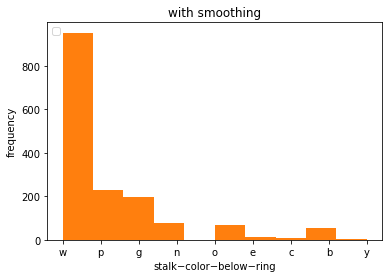

In [55]:
# Question
# Show P(Xstalk−color−below−ring|Y=e) with and without Laplace smoothing by histograms
A = df_drop[(df_drop.columns)[14]].value_counts()
print(A)
dict = ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
z = lst_tes[0][lst_tes[0].columns[14]]
z.reset_index(drop = True, inplace = True)
clf.fit(lst_tra[0][lst_tra[0].columns[1:-1]], lst_tra[0][lst_tra[0].columns[0]])
b = clf.predict(lst_tes[0][lst_tes[0].columns[1:-1]])
x = []
for i in range(len(b)):
    if b[i] == 0:
        x.append(dict[z[i]])
plt.hist(x, density=False)
    
plt.legend(loc='upper left')
plt.title('no smoothing')
plt.xlabel('stalk−color−below−ring')
plt.ylabel('frequency')
plt.savefig('Question1-1')


clf_lp.fit(lst_tra[0][lst_tra[0].columns[1:-1]], lst_tra[0][lst_tra[0].columns[0]])
b = clf_lp.predict(lst_tes[0][lst_tes[0].columns[1:-1]])
x = []
for i in range(len(b)):
    if b[i] == 0:
        x.append(dict[z[i]])
plt.hist(x, density=False)
    
plt.legend(loc='upper left')
plt.title('with smoothing')
plt.xlabel('stalk−color−below−ring')
plt.ylabel('frequency')
plt.savefig('Question1-2')


In [56]:
# Question
# What are the values of μ and σ of assumed P(Xpetal_length|Y=Iris Versicolour)?

first = df_training2[df_training2.columns[-1]] #e/p
edible = df_training2[first==1] #e的feature

first = edible['petal_length'] #e/p
mean = sum(first)/len(first)
stdev = sum([(x-mean)**2 for x in first]) / float(len (first)-1)
print('From overall training data:')
print('mean: ', mean)
print('stdev: ', sqrt(stdev))
print()

z = lst_tes2[3]['petal_length']
z.reset_index(drop = True, inplace = True)
# print(z)
gnb.fit(lst_tra2[3][lst_tra2[3].columns[:4]], lst_tra2[3][lst_tra2[3].columns[-1]])
b = gnb.predict(lst_tes2[3][lst_tes2[3].columns[:4]])
#print(b)
x = []
for i in range(len(b)):
    if b[i] == 1:
        x.append(z[i])
#print(x)
mean = sum(x)/len(x)
stdev = sum([(i-mean)**2 for i in x]) / float(len (x)-1)
print('From trained result of Kfold:')
print('mean: ', mean)
print('stdev: ', sqrt(stdev))

From overall training data:
mean:  4.26
stdev:  0.46991097723995806

From trained result of Kfold:
mean:  4.271428571428571
stdev:  0.48742426856119675


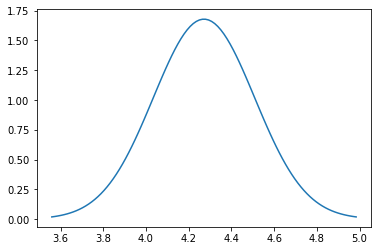

In [57]:
# Question
# Use a graph to show the probability density function of assumed P(Xpetal_length|Y=Iris Versicolour)
import scipy.stats as stats
import math

x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x, stats.norm.pdf(x, mean, stdev))
plt.savefig('Question2-2.png')